<h1><center>Beer Recommender System</center></h1>


## Problem Statement: (modified)
Can we recommend a beer type (genre) based on your taste preference? The recommender system will take in a database compiled of a variety of beer selections that will either be scraped or taken from a set that has already been compiled. Beer types will include: IPA, Ale, Lager, etc. as well as the top brands that sell the specific beer types. The output will be about 5-7 beer recommendations. (Number of recommendations will vary depending on information availability).

- *Beer: type, brand, (preference).*

## Beer Datasets

https://www.kaggle.com/rdoume/beerreviews?select=beer_reviews.csv

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [42]:
beer = pd.read_csv('../data/beer_reviews_old.csv')
beer.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [43]:
beer.shape

(1586614, 13)

In [44]:
beer.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [45]:
beer = beer[['review_overall','review_aroma','review_appearance', 'review_profilename', 'beer_style', 'review_palate', 'review_taste', 'beer_name', 'beer_beerid']]

In [46]:
beer.shape

(1586614, 9)

In [47]:
beer.isnull().sum()

review_overall          0
review_aroma            0
review_appearance       0
review_profilename    348
beer_style              0
review_palate           0
review_taste            0
beer_name               0
beer_beerid             0
dtype: int64

In [48]:
beer = beer.dropna(subset=['review_profilename'])

In [49]:
beer.isnull().sum()

review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_beerid           0
dtype: int64

In [50]:
beer.to_csv('beer_reviews.csv', index=False)
#exported into a .csv file

### Reading in revised beer dataframe 

In [51]:
beer = pd.read_csv('../data/beer_reviews.csv')
beer.head()

,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_beerid
0,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,47986
1,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,48213
2,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,48215
3,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,47969
4,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,64883


In [31]:
beer = beer.drop(['Unnamed: 0'], axis=1)

In [33]:
beer.shape

(1586266, 9)

In [34]:
beer.dtypes

review_overall        float64
review_aroma          float64
review_appearance     float64
review_profilename     object
beer_style             object
review_palate         float64
review_taste          float64
beer_name              object
beer_beerid             int64
dtype: object

In [35]:
beer['beer_name']

0                    Sausa Weizen
1                        Red Moon
2          Black Horse Black Beer
3                      Sausa Pils
4                   Cauldron DIPA
                    ...          
1586261        The Horseman's Ale
1586262        The Horseman's Ale
1586263        The Horseman's Ale
1586264        The Horseman's Ale
1586265        The Horseman's Ale
Name: beer_name, Length: 1586266, dtype: object

In [36]:
#Type of beers 
#Will probably re-name col. 
beer['beer_style' ].unique()

array(['Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout',
       'German Pilsener', 'American Double / Imperial IPA',
       'Herbed / Spiced Beer', 'Light Lager', 'Oatmeal Stout',
       'American Pale Lager', 'Rauchbier', 'American Pale Ale (APA)',
       'American Porter', 'Belgian Strong Dark Ale', 'American IPA',
       'American Stout', 'Russian Imperial Stout',
       'American Amber / Red Ale', 'American Strong Ale',
       'Märzen / Oktoberfest', 'American Adjunct Lager',
       'American Blonde Ale', 'Euro Pale Lager', 'English Brown Ale',
       'Scotch Ale / Wee Heavy', 'Fruit / Vegetable Beer',
       'American Double / Imperial Stout', 'Belgian Pale Ale',
       'English Bitter', 'English Porter', 'Irish Dry Stout',
       'American Barleywine', 'Belgian Strong Pale Ale', 'Doppelbock',
       'Maibock / Helles Bock', 'Pumpkin Ale',
       'Dortmunder / Export Lager', 'Euro Strong Lager',
       'Euro Dark Lager', 'Low Alcohol Beer', 'Weizenbock',
       'Extra 

In [37]:
# Review_taste rating of of 5
# col is a float
beer['review_taste'].tail()


1586261    4.0
1586262    4.0
1586263    4.0
1586264    4.5
1586265    4.5
Name: review_taste, dtype: float64

Text(0.5, 1.0, 'Taste Review')

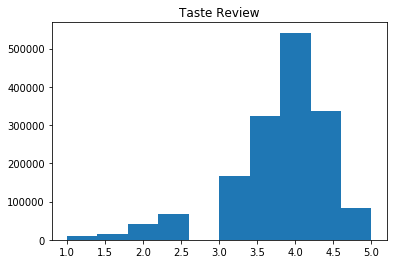

In [38]:
plt.hist(beer['review_taste'])
plt.title('Taste Review')

In [39]:
# Overall rating out of 5
beer['review_overall']

0          1.5
1          3.0
2          3.0
3          3.0
4          4.0
          ... 
1586261    5.0
1586262    4.0
1586263    4.5
1586264    4.0
1586265    5.0
Name: review_overall, Length: 1586266, dtype: float64

Text(0.5, 1.0, 'Overall Reviews')

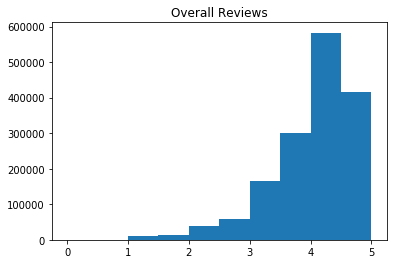

In [40]:
plt.hist(beer['review_overall'])
plt.title('Overall Reviews')

------

-----

## NEXT STEPS:

1. Collect more data (datasets)
2. Scrape Beer website(s) for beer selection
3. Further research on differnt modeling methods that best suits my rec. sys.
4. Further research on recommender system
5. https://blog.galvanize.com/beer-recommender/